In [1]:
execfile("core_functions.py")

Using Theano backend.


In [2]:
import numpy as np
from scipy.io import loadmat
import os
from scipy.ndimage.interpolation import zoom

In [3]:
cd './Documents/'

[Errno 2] No such file or directory: './Documents/'
/home/songbird/Documents


In [4]:
execfile("gn_ae_functions.py")

In [5]:
cd './Anja_data/'

/home/songbird/Documents/Anja_data


In [6]:
#get data, x is vectorized, fixed length spectrograms, y are labels/cluster numbers

x,y = extract_data('.',nfiles="all",Nsamp=6000,permuut=1,flattn=1,rsize=1,W=40,H=60)


 loading file 

b4g13b-2015-05-08.mat
numb available samples is 

5484

 loading file 

g17p17-2015-11-27-0135.mat
numb available samples is 

5952

 loading file 

g14p4-2014-12-26-0103.mat
numb available samples is 

24130


/usr/local/lib/python2.7/dist-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)



 loading file 

g11o4-2014-09-27.mat
numb available samples is 

26077

 loading file 

g11y2-2014-06-03.mat
numb available samples is 

3602

 loading file 

b8g10-2014-11-20.mat
numb available samples is 

6914

 loading file 

g18o11-2015-12-10-0108.mat
numb available samples is 

24192

 loading file 

b14g16-2015-06-24.mat
numb available samples is 

15974


In [7]:
xtrain,ytrain,xtest,ytest,xval,yval = data_split(x,y,1,0.2)

In [8]:
xtrain = np.asarray(xtrain)
ytrain = np.asarray(ytrain)
xtest = np.asarray(xtest)
ytest = np.asarray(ytest)


In [9]:
xtrain.shape

(37524, 2400)

In [10]:
xtest.shape

(7506, 2400)

In [37]:
n_hidden = [2400,600,400]

In [38]:
n_hidden[-1]

400

In [39]:
#build autoencoder

ae = gn_build_ae(n_hidden,dropout=0,activh='relu',activo='tanh',wreg=[0.0,0.0])

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_37 (Dense)                   (None, 600)         1440600     dense_input_7[0][0]              
____________________________________________________________________________________________________
activation_37 (Activation)         (None, 600)         0           dense_37[0][0]                   
____________________________________________________________________________________________________
dense_38 (Dense)                   (None, 400)         240400      activation_37[0][0]              
____________________________________________________________________________________________________
activation_38 (Activation)         (None, 400)         0           dense_38[0][0]                   
___________________________________________________________________________________________

In [14]:
ytrain.shape

(37524, 1)

In [18]:
del ae

In [41]:
ae.fit(xtrain,xtrain,batch_size=128,nb_epoch=1)

Epoch 1/1
12544/37524 [=========>....................] - ETA: 11s - loss: nan - acc: 5.5804e-04

KeyboardInterrupt: 

In [26]:
import matplotlib.pyplot as plt

In [47]:
out = ae.evaluate(xtest,xtest)

5266/5266 [==============================] - 4s     


In [48]:
type(out)

list

In [53]:
type(xtest)

numpy.ndarray

In [54]:
xtest[0].shape

(2400,)

In [27]:
xo = ae.predict(xtest)

In [57]:
type(xo)

numpy.ndarray

In [28]:
xo.shape

(7506, 2400)

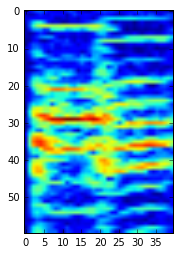

In [29]:
%matplotlib inline
plt.imshow(xtest[10].reshape(60,40))

In [31]:
xo[10]

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])